# Exploratory Data Analysis - Healthcare

## Table of Contents
1. [Introduction](#introduction)
2. [Data Loading](#data-loading)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
    1. [Evolution of Hospital Beds](#evolution-of-hospital-beds)
    2. [Hospital Trends](#hospital-trends)
    3. [Correlation Analysis](#correlation-analysis)
    4. [Trends in Occupancy Rate](#trends-in-occupancy-rate)
    5. [Patient Trends](#patient-trends)
4. [Summary and Conclusion](#summary-and-conclusion) 
5. [References](#references)


## Introduction <a name="introduction"></a>

This dataset provides comprehensive information about the healthcare system metrics in Germany from 1991 to 2022. It includes data on the number of hospitals, hospital beds, patients, occupancy rates, and other relevant indicators. The dataset is well-organized and accessible, making it valuable for analyzing trends and patterns in the healthcare system over the years. Understanding the relationship between hospital infrastructure and patient metrics can inform resource allocation decisions and help optimize the healthcare system.

## Data Loading <a name="data-loading"></a>

In [26]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns


In [27]:
# load the dataset that is separated by ';'
healthcare_df = pd.read_csv('../data/healthcare_data.csv', delimiter=';')
healthcare_df.head()

,Year,Hospitals,Beds,Beds_per_100000_inhabitants,Patients,Patients_per_100000_inhabitants,Occupancy_days,Average_length_of_stay,Average_occupancy_of_beds
0,1991,2411,665565,832,14576613,18224,204204,14.0,84.1
1,1992,2381,646995,803,14974845,18581,198769,13.2,83.9
2,1993,2354,628658,774,15191174,18713,190741,12.5,83.1
3,1994,2337,618176,759,15497702,19034,186049,11.9,82.5
4,1995,2325,609123,746,15931168,19509,182627,11.4,82.1


## Exploratory Data Analysis <a name="exploratory-data-analysis"></a>

In [28]:
# check missing value
print(healthcare_df.isnull().sum())

Year                               0
Hospitals                          0
Beds                               0
Beds_per_100000_inhabitants        0
Patients                           0
Patients_per_100000_inhabitants    0
Occupancy_days                     0
Average_length_of_stay             0
Average_occupancy_of_beds          0
dtype: int64


There are no null values in the dataset.

In [29]:
#check the number of rows and columns
healthcare_df.shape

(32, 9)

In [30]:
# check data types 
healthcare_df.dtypes

Year                                 int64
Hospitals                            int64
Beds                                 int64
Beds_per_100000_inhabitants          int64
Patients                             int64
Patients_per_100000_inhabitants      int64
Occupancy_days                       int64
Average_length_of_stay             float64
Average_occupancy_of_beds          float64
dtype: object

The dataset has only integers and float values as well as there are no missing values in the dataset.

In [31]:
# Statistics of the dataset
healthcare_df.describe()

,Year,Hospitals,Beds,Beds_per_100000_inhabitants,Patients,Patients_per_100000_inhabitants,Occupancy_days,Average_length_of_stay,Average_occupancy_of_beds
count,32.000000,32.000000,32.000000,32.000000,3.200000e+01,32.000000,32.000000,32.000000,32.000000
mean,2006.500000,2121.437500,537744.406250,656.500000,1.734396e+07,21156.468750,154066.218750,8.990625,78.131250
std,9.380832,160.892659,51876.943139,67.442688,1.368155e+06,1648.024487,22034.799628,1.919738,4.141718
min,1991.000000,1887.000000,480382.000000,573.000000,1.457661e+07,18224.000000,120202.000000,7.200000,67.300000
25%,1998.750000,1974.000000,500341.000000,612.500000,1.669161e+07,20054.750000,141485.500000,7.375000,77.200000
50%,2006.500000,2095.500000,508860.500000,625.000000,1.722075e+07,20921.500000,142714.000000,8.400000,77.500000
75%,2014.250000,2253.500000,566858.250000,691.000000,1.841323e+07,22941.500000,170222.500000,9.950000,81.300000
max,2022.000000,2411.000000,665565.000000,832.000000,1.953278e+07,23720.000000,204204.000000,14.000000,84.100000


Here, in this dataset the mean values for most variables are lower than the median values, i.e skewed distribution with some outliers. The Standard deviations for bed and patient numbers are relatively high, indicating a wide range of values.

In [32]:
# columns to perform analysis
Uni_analysis = [
    'Hospitals', 
    'Beds', 
    'Beds_per_100000_inhabitants', 
    'Patients', 
    'Patients_per_100000_inhabitants', 
    'Occupancy_days', 
    'Average_length_of_stay', 
    'Average_occupancy_of_beds']

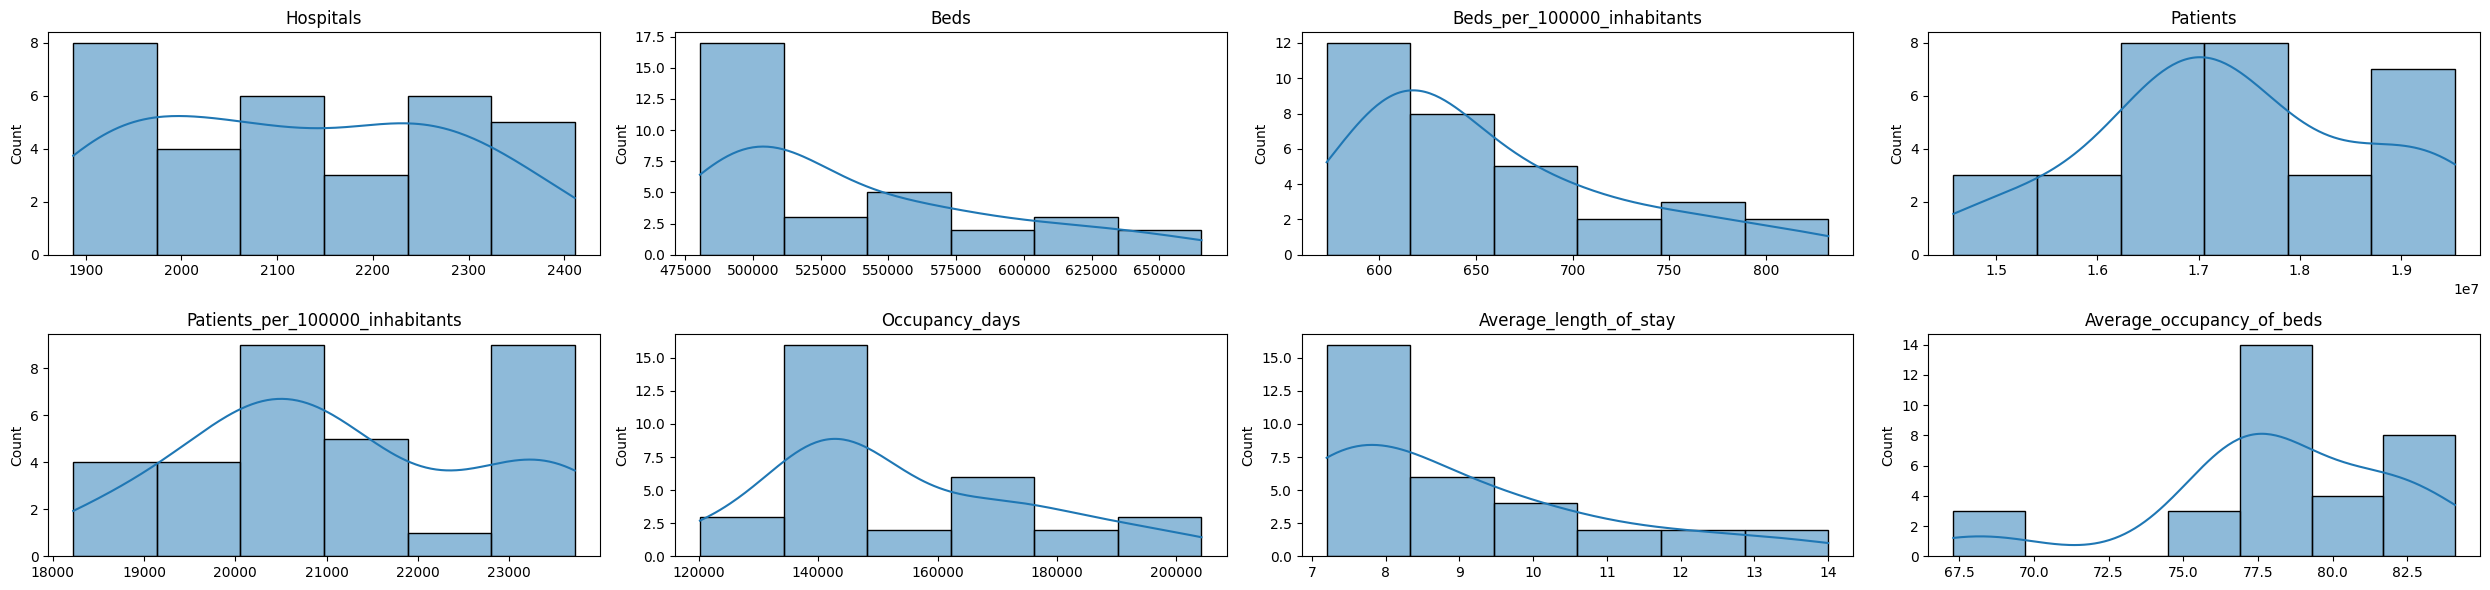

In [33]:
# Create a figure with subplots for each variable
fig, axes = plt.subplots(2, 4, figsize=(5*5, 3*2))

# Iterate over each variable and create a histogram
for i, (col, ax) in enumerate(zip(healthcare_df[Uni_analysis], axes.flatten())):
    sns.histplot(data=healthcare_df, x=col, ax=ax,kde=True)
    ax.set_title(col)
    ax.set_xlabel('')

# Show the figure
plt.tight_layout()
#save the plot
plt.savefig('../Results/Distribution_plot.png')
plt.show()

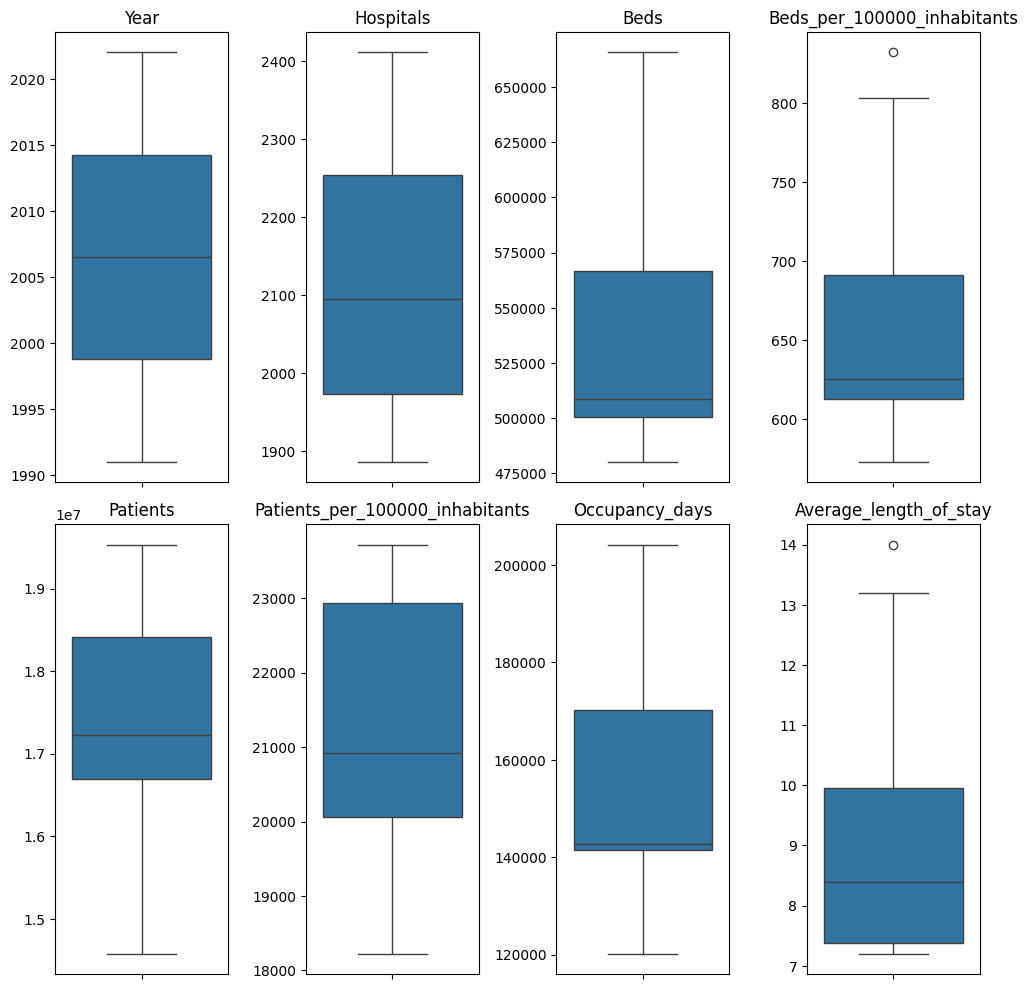

In [42]:
# Create a figure with subplots for each variable
fig, axes = plt.subplots(2, 4, figsize=(10, 10))

# Iterate over each variable and create a boxplot
for i, (col, ax) in enumerate(zip(healthcare_df, axes.flatten())): 
    # Boxplot
    sns.boxplot(data=healthcare_df, y=col, ax=ax)
    ax.set_ylabel('')
    ax.set_title(col)
    ax.set_xlabel('')
    

# Show the figure
plt.tight_layout()
plt.savefig('../Results/Boxplot.png')
plt.show()



In [35]:
# Calculate correlation matrix
correlation_matrix = healthcare_df.corr()

# Print correlation matrix
correlation_matrix

,Year,Hospitals,Beds,Beds_per_100000_inhabitants,Patients,Patients_per_100000_inhabitants,Occupancy_days,Average_length_of_stay,Average_occupancy_of_beds
Year,1.000000,-0.994860,-0.925504,-0.921035,0.749245,0.696263,-0.933946,-0.925984,-0.821713
Hospitals,-0.994860,1.000000,0.936583,0.929842,-0.770186,-0.721025,0.937946,0.937714,0.808163
Beds,-0.925504,0.936583,1.000000,0.995563,-0.784604,-0.734539,0.978753,0.992379,0.780443
Beds_per_100000_inhabitants,-0.921035,0.929842,0.995563,1.000000,-0.762405,-0.700145,0.981119,0.988915,0.795629
Patients,0.749245,-0.770186,-0.784604,-0.762405,1.000000,0.989589,-0.664959,-0.834149,-0.302276
Patients_per_100000_inhabitants,0.696263,-0.721025,-0.734539,-0.700145,0.989589,1.000000,-0.604745,-0.784544,-0.230666
Occupancy_days,-0.933946,0.937946,0.978753,0.981119,-0.664959,-0.604745,1.000000,0.962654,0.891460
Average_length_of_stay,-0.925984,0.937714,0.992379,0.988915,-0.834149,-0.784544,0.962654,1.000000,0.746869
Average_occupancy_of_beds,-0.821713,0.808163,0.780443,0.795629,-0.302276,-0.230666,0.891460,0.746869,1.000000


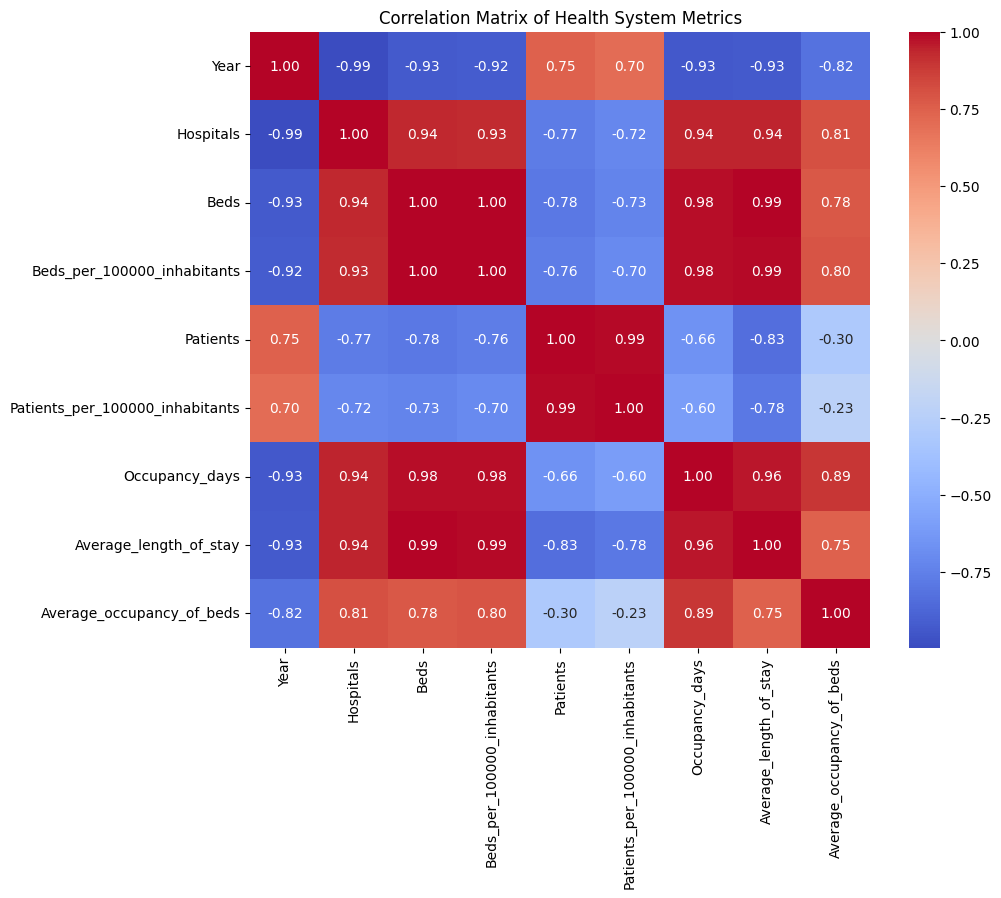

In [36]:
# Calculate correlation matrix
correlation_matrix = healthcare_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Health System Metrics')
plt.savefig('../Results/Correlation_Matrix.png')
plt.show()

Correlation between "Hospitals" and "Patients" is 0.749245, indicating a medium positive correlation. This means that as the number of hospitals increases, the number of patients increases. 
Correlation between "Hospitals" and "Occupancy_days" is -0.770186, indicating a strong negative correlation. This means that as the number of hospitals increases, the average number of occupancy days decreases.

# Evolution of Hospital Beds <a name="evolution-of-hospital-beds"></a>

We aim to analyze how the number of hospital beds and beds per 100,000 inhabitants have evolved in Germany since 1991. We will plot these metrics over time to visualize the trends.

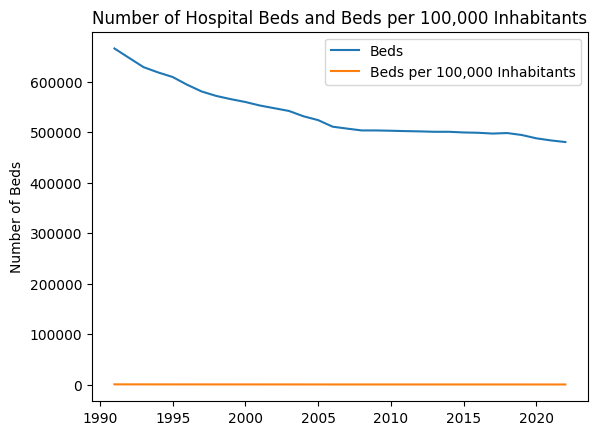

In [37]:
plt.plot(healthcare_df['Year'],healthcare_df['Beds'])
plt.plot(healthcare_df['Year'],healthcare_df['Beds_per_100000_inhabitants'])
plt.ylabel('Number of Beds')
plt.title('Number of Hospital Beds and Beds per 100,000 Inhabitants')
plt.legend(['Beds', 'Beds per 100,000 Inhabitants'])
plt.savefig('../Results/Evolution_of_Hospital.png')
plt.show()

# Hospital Trends <a name="hospital-trends"></a>

Our second research question focuses on the changes in the number of hospitals in Germany over time. We will plot the number of hospitals over the years to understand the trend.

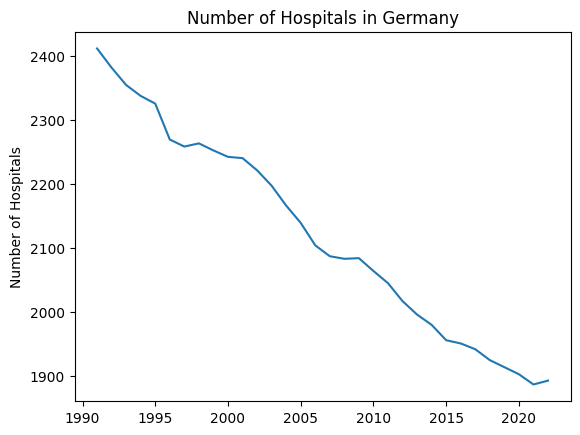

In [38]:
plt.plot(healthcare_df['Year'],healthcare_df['Hospitals'])
plt.ylabel('Number of Hospitals')
plt.title('Number of Hospitals in Germany')
plt.savefig('../Results/Hospital_trends.png')
plt.show()

# Correlation Analysis <a name="correlation-analysis"></a>

We are interested in understanding if there is a correlation between the average length of stay and the average occupancy of hospital beds in Germany. We will calculate the correlation coefficient to answer this question.

In [39]:
correlation = healthcare_df['Average_length_of_stay'].corr(healthcare_df['Average_occupancy_of_beds'])
print('Correlation:', correlation)

Correlation: 0.7468692146091166


There is a strong positive correlation, that is the average length of stay in the hospital increases, the average occupancy of beds also tends to increase.

# Trends in Occupancy Rate <a name="trends-in-occupancy-rate"></a>

We want to investigate if there are any significant differences in hospital bed occupancy and average length of stay between different years in the dataset. We will use statistical tests to determine this.

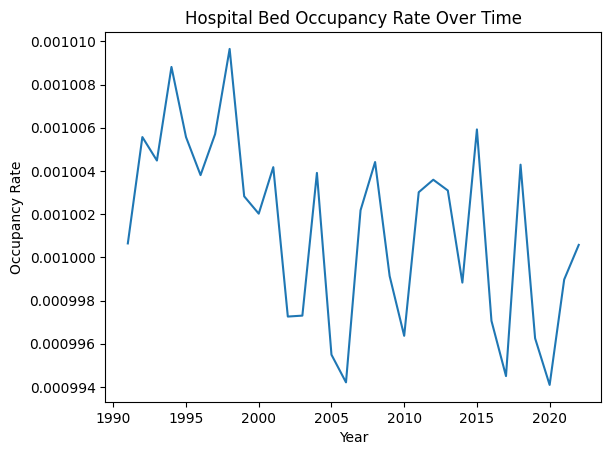

In [40]:
# Calculate the occupancy rate
healthcare_df['Occupancy_rate'] = healthcare_df['Occupancy_days'] / (healthcare_df['Average_length_of_stay'] * healthcare_df['Patients'])

plt.plot(healthcare_df['Year'], healthcare_df['Occupancy_rate'])
plt.xlabel('Year')
plt.ylabel('Occupancy Rate')
plt.title('Hospital Bed Occupancy Rate Over Time')
plt.savefig('../Results/Occupancy_rate.png')
plt.show()

It can be observed that the hospital bed occupancy rate has been steadily decreasing from 2000 to 2020. The occupancy rate is a relatively low number, which could be due to a variety of factors such as an increase in hospital bed capacity, a decrease in hospital admissions, or a combination of both.

# Patient Trends <a name="patient-trends"></a>

Our fifth research question is about how the occupancy rate has changed over time. We will plot the occupancy rate over the years to visualize the trend.

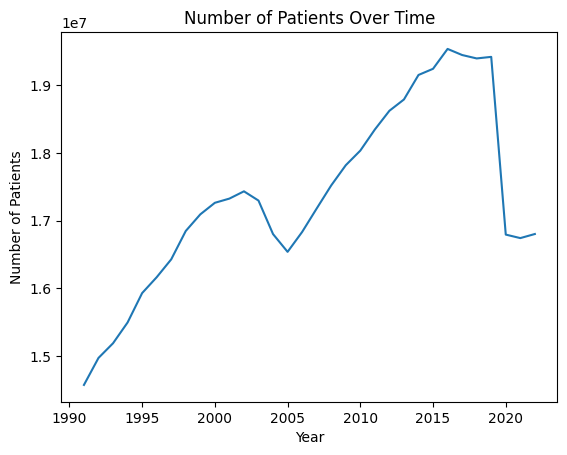

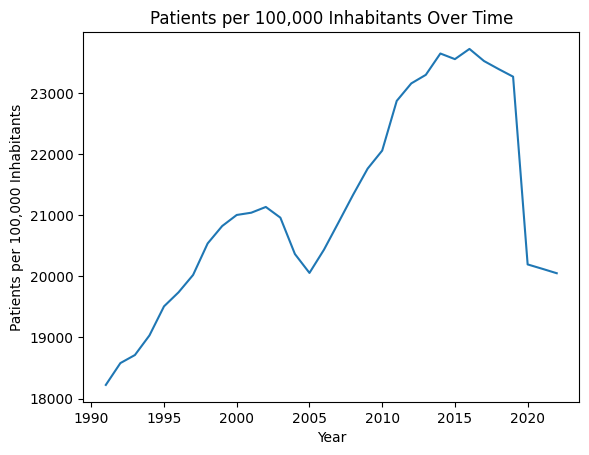

In [41]:
# Plot the number of patients over time
plt.plot(healthcare_df['Year'], healthcare_df['Patients'])
plt.xlabel('Year')
plt.ylabel('Number of Patients')
plt.title('Number of Patients Over Time')
plt.savefig('../Results/Number_of_patients_over_time.png')
plt.show()

# Plot the patients per 100,000 inhabitants over time
plt.plot(healthcare_df['Year'], healthcare_df['Patients_per_100000_inhabitants'])
plt.xlabel('Year')
plt.ylabel('Patients per 100,000 Inhabitants')
plt.title('Patients per 100,000 Inhabitants Over Time')
plt.savefig('../Results/Patients_per 100,000_Inhabitants_Over_Time.png')
plt.show()

From 2020 the number of patient decreases. Also moreover there is no much difference in both the plots expect between the year 2014 to 2018.

# Summary and Conclusion <a name="summary-and-conclusion"></a>

The analysis of the healthcare system metrics in Germany from 1991 to 2022 provided several key insights into the evolution of hospitals and related factors over time. By analyzing the data, we were able to gain insights into how changes in hospital infrastructure and patient metrics have evolved and influenced each other over the years.<br/>

**Findings:**
The findings contribute to answering the research questions by providing a comprehensive overview of the trends and patterns in the German healthcare system over time.
- Despite the decrease in the number of hospitals and beds, the occupancy rate and average length of stay have remained relatively stable, indicating efficient utilization of available resources.
- By analyzing the data, we were able to gain insights into how changes in hospital infrastructure and patient metrics have evolved and influenced each other over the years.
- One unexpected trend was the gradual decrease in the number of hospitals and beds despite a relatively stable occupancy rate and average length of stay.<br/>

**Limitations:**
- One limitation of the analysis is that the data may not capture variations at the regional level.

# References <a name="references"></a>

- [Pandas documentation](https://pandas.pydata.org/docs/)
- [Matplotlib documentation](https://matplotlib.org/stable/contents.html)
